In [1]:
# This is a sample Python script.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Generate a synthetic dataset with easy separability
X, y = make_classification(
    n_samples=10000,      # Total number of samples
    n_features=2,         # Number of features (dimensions)
    n_informative=2,     # Number of informative features
    n_redundant=0,       # Number of redundant features
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0,            # Fraction of samples whose class is randomly exchanged
    class_sep=2,         # Separation between the classes
    weights = [0.5, 0.5], # Can adjust balance of the data
    hypercube=True,
    random_state=42
)

print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/tmp/ipykernel_23587/1295941256.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', s=70, label='Test')


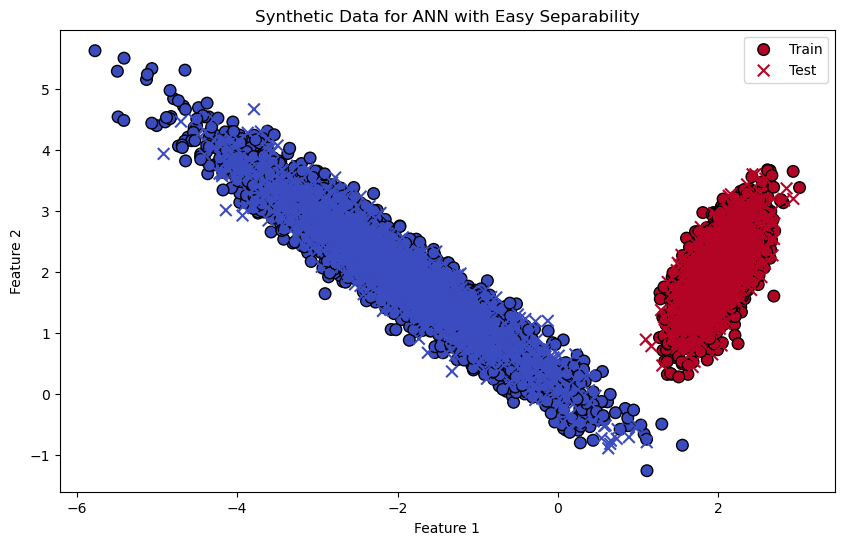

In [4]:
# Plot the generated dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', edgecolor='k', s=70, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', s=70, label='Test')
plt.title("Synthetic Data for ANN with Easy Separability")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [5]:

# Step 3: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [6]:

# Step 4: Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)

# Step 5: Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9993333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1492
           1       1.00      1.00      1.00      1508

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Confusion Matrix:
 [[1492    0]
 [   2 1506]]


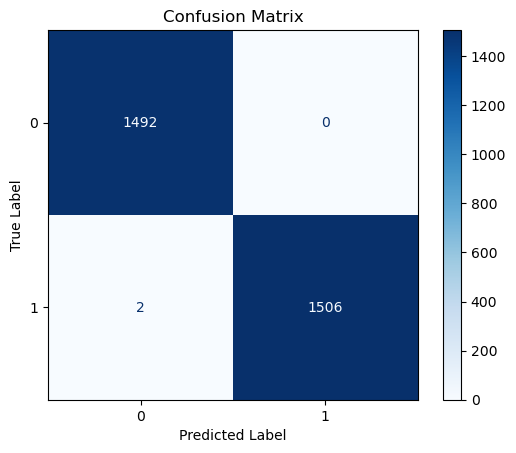

In [7]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

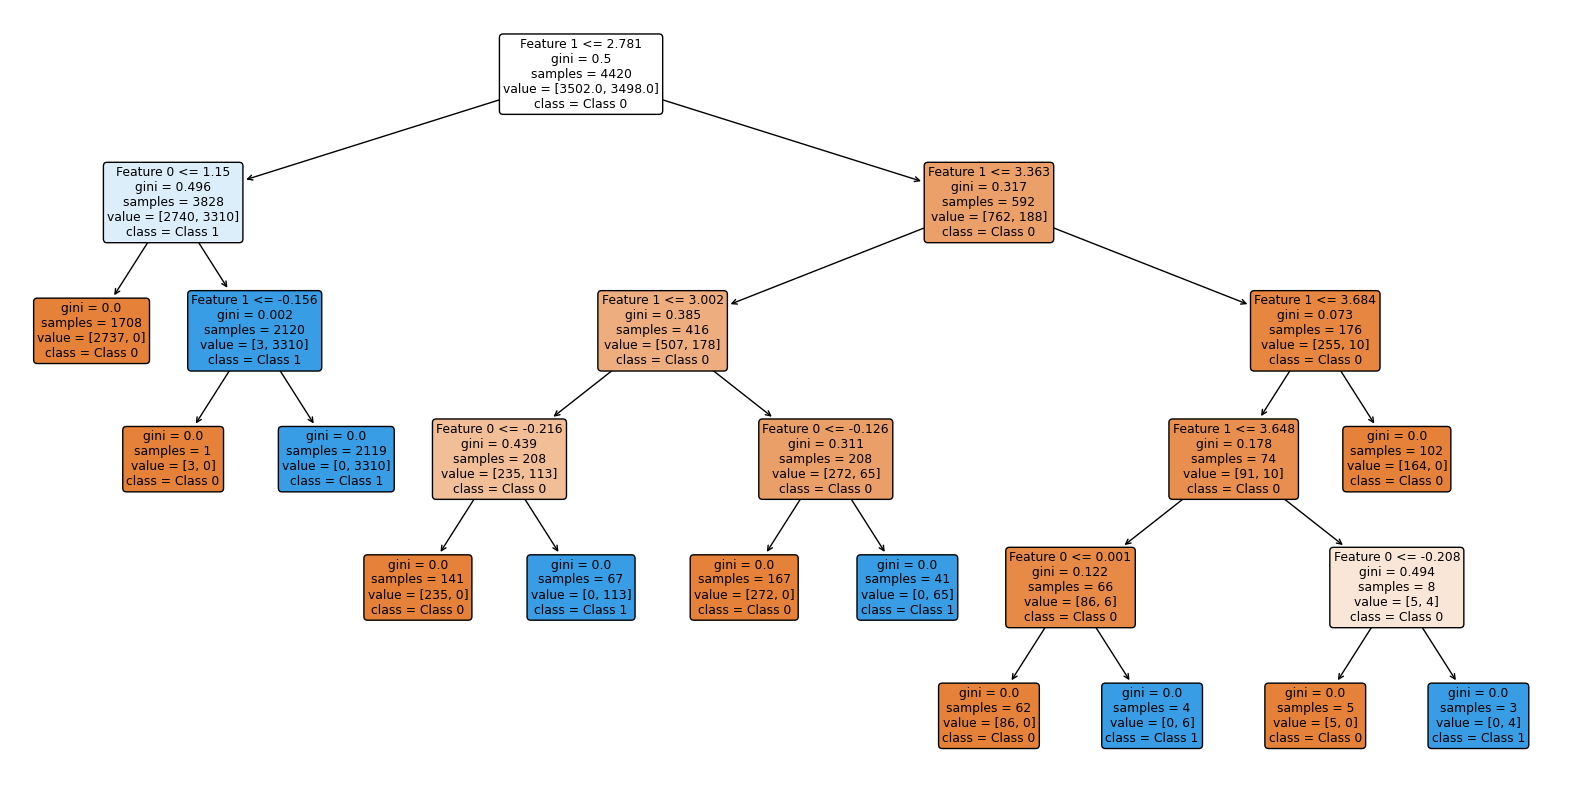

In [17]:
single_tree = rf_model.estimators_[0]

# Generate a plot for the selected tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=[f"Feature {i}" for i in range(X.shape[1])],
          class_names=["Class 0", "Class 1"], filled=True, rounded=True)
plt.show()

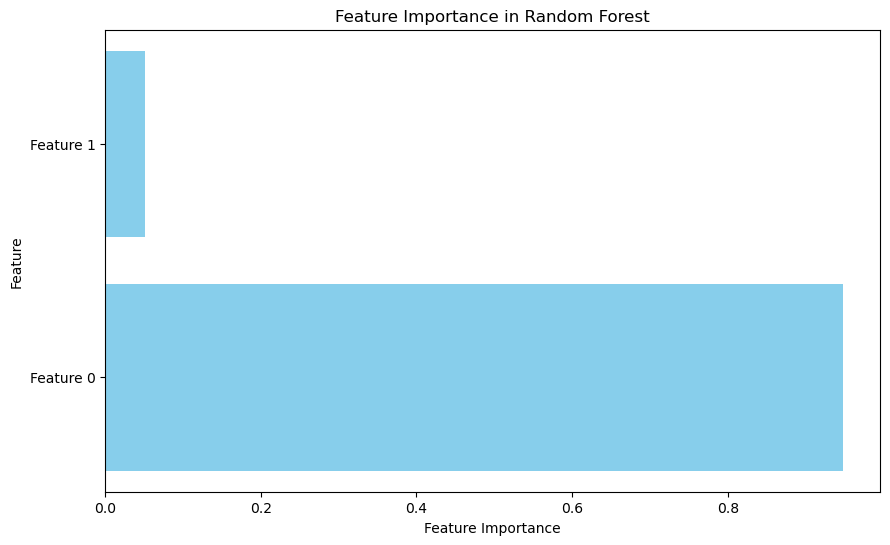

Feature 0: 0.9484
Feature 1: 0.0516


In [19]:
# Retrieve feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
features = [f"Feature {i}" for i in range(X.shape[1])]
plt.barh(features, feature_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()

# Print feature importance values
for i, importance in enumerate(feature_importances):
    print(f"{features[i]}: {importance:.4f}")
